# Импорт библиотек

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 9.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 10.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 10.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.8 MB 11.3 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.8 MB 11.3 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.8 MB 11.3 MB/s eta 0:00:01



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_style("whitegrid")

# Загрузка данных

In [9]:
#  использую классический Немецкий кредитный датасет (German Credit Data).

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans',
    'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'
]

df = pd.read_csv(url, header=None, names=column_names, delim_whitespace=True)

df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_18440\3654595654.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, header=None, names=column_names, delim_whitespace=True)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Первичный Осмотр данных

In [7]:
print("Размер датасета: ", df.shape)

df.info

print("\nПропуски в данных:")
print(df.isnull().sum())

Размер датасета:  (1000, 21)

Пропуски в данных:
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


# Статистики числовых признаков

In [8]:
df.describe()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# Анализ целевой переменной

credit_risk
1    700
2    300
Name: count, dtype: int64


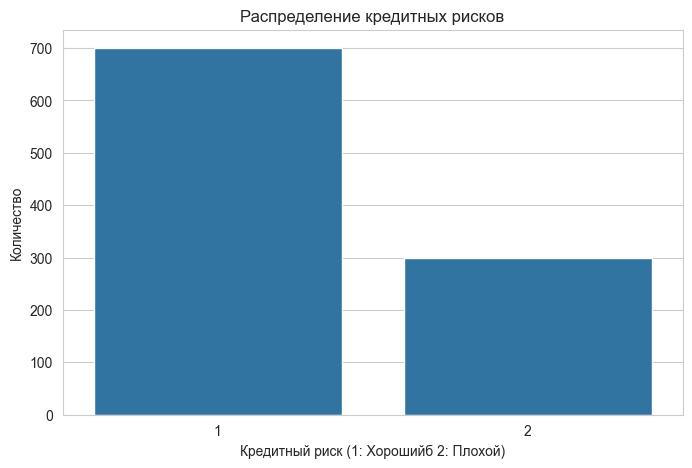

Процент 'плохих' клиентов:  30.00%


In [11]:
risk_counts = df['credit_risk'].value_counts()
print(risk_counts)

# строим barplot
plt.figure(figsize=(8,5))
sns.barplot(x=risk_counts.index, y=risk_counts.values)
plt.title('Распределение кредитных рисков')
plt.xlabel('Кредитный риск (1: Хорошийб 2: Плохой)')
plt.ylabel('Количество')
plt.show()

bad_rate = (risk_counts[2]/ len(df)) * 100
print(f"Процент 'плохих' клиентов: {bad_rate: .2f}%")